In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. 

**Do not edit this cell.**

In [ ]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


In [ ]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

## Problem 1
How many samples are there in the dataset?

### Answer
1998

## Solution

In [ ]:
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?

### Answer

2


## Solution

In [ ]:
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.

### Answer
0

## Solution

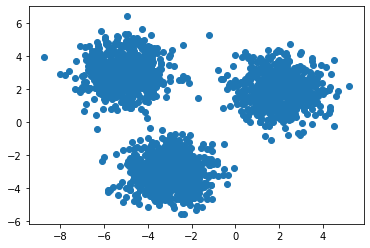

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])


## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [ ]:
k = 3

indices_of_initial_cluster_centers = np.array([200, 800, 1200])
cluster_centers = X[indices_of_initial_cluster_centers]

## Problem 4 

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.

### Answer

0.710 (Range: 0.65 - 0.75)

## Solution

In [ ]:
def assign_clusters(X, k, cluster_centers):
  z = np.array([])
  for each in X:
    dists_from_each_center = [np.linalg.norm(cluster_centers[i]- each) for i in range(k)] 
    z = np.append(z, np.argmin(dists_from_each_center))
  return z

z = assign_clusters(X, k, cluster_centers)
z

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
z.mean()

0.7107107107107107

## Problem 5

Plot the data points, with different color for different clusters.

### Answer

0


## Solution

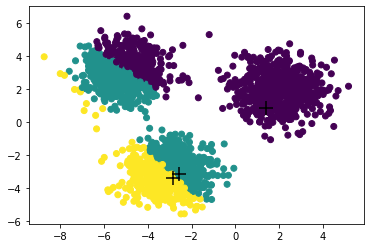

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = z)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = '+', s = 200, color = 'k')

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per `z` and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.

## Answer

(1) -2.552 (Range: -3 to -2)

(2) -0.192 (Range: -0.25 to -0.15)

## Solution

In [ ]:
def compute_cluster_centers(X, z, k):
  cluster_centers = np.array([np.mean(X[z == i], axis = 0) for i in range(k)])
  return cluster_centers

cluster_centers = compute_cluster_centers(X, z, k)
cluster_centers

array([[ 0.15243752,  2.47002787],
       [-4.09339723,  0.26891354],
       [-3.71658966, -3.31569723]])

In [ ]:
cluster_centers.mean(axis = 0)

array([-2.55251646, -0.19225194])

## Extra

Keep executing the code in problems 4, 5 and 6 (for, say 10 iterations) to observe how the clusters change across different iterations.

## Solution

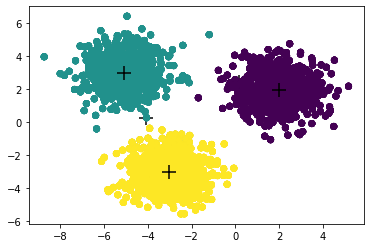

In [ ]:
for i in range(10):
  z = assign_clusters(X, k, cluster_centers)
  plt.scatter(X[:, 0], X[:, 1], c = z)
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = '+', s = 200, color = 'k')
  cluster_centers = compute_cluster_centers(X, z, k)
